# Metodo de Monte Carlo acierto y error


**PASO 1**. Genere una secuencia $\{U_j\}_{j=1}^{2N}$ de $2N$ números aleatorios.

In [91]:
from random import random

"""
  Esta funcion genera un par de numeros aleatorios con distribucion uniforme
  con a=0 y b=1
"""
def uniforme():
  return (random(),random())

# Pequeña prueba del codigo

for i in range(10):
  print(uniforme())


(0.3464327283038433, 0.06559147780994101)
(0.18745748856959976, 0.10144301907489073)
(0.5763829790879257, 0.6353898720613076)
(0.8457486610551076, 0.8259136476062763)
(0.9324714868187962, 0.012530830698642803)
(0.23025934009885773, 0.7349743245963134)
(0.32118845374803195, 0.39732102430356697)
(0.6795615377415434, 0.6134960569372868)
(0.05201030133117013, 0.6434712935024978)
(0.4214888178557471, 0.8641887395862279)


**PASO 2**. Organice los números aleatorios en $N$ pares $(U_1,U_1^´),(U_2,U_2^´),...,(U_N,U_N^´)$ de cualquier forma tal que cada número aleatorio $U_j$ se use exactamente una vez.

In [89]:
N = 5 #por ejemplo

def lista(n):
  l = []
  for n in range(n):
    l.append(uniforme())
  return l

print(lista(N))

[(0.8172574574900865, 0.2271608663677701), (0.9618995394852846, 0.30816403795287184), (0.6953746488300264, 0.20487983128730336), (0.16584403883743337, 0.9166526479396129), (0.91383119251491, 0.018650092225465098)]


**PASO 3**. Calcule $X_i=a+U_i(b-a)\hspace{0.5cm}$ y $\hspace{0.5cm}g(X_i) , \hspace{0.5cm}i=1,2,...,N$

In [66]:
X = lambda a,b,u: a+u[0]*(b-a)

a = 0
b = 1

# pequeña prueba del codigo
for j in :
  print(X(a,b,j))

0.860691748808739
0.37689992111084125
0.3955464099955024
0.9570645577479209
0.27884763784992717


A modo de ejemplo se va a utilizar la función $g(x)=-x^2+x$

In [67]:
import numpy as np

g = np.poly1d([-1,1,0])

for j in lista:
  print(X(a,b,j),g(X(a,b,j)))


0.860691748808739 0.11990146234129354
0.37689992111084125 0.2348463705774829
0.3955464099955024 0.2390894475351723
0.9570645577479209 0.041091990050697504
0.27884763784992717 0.20109163271544303


Grafica de la función

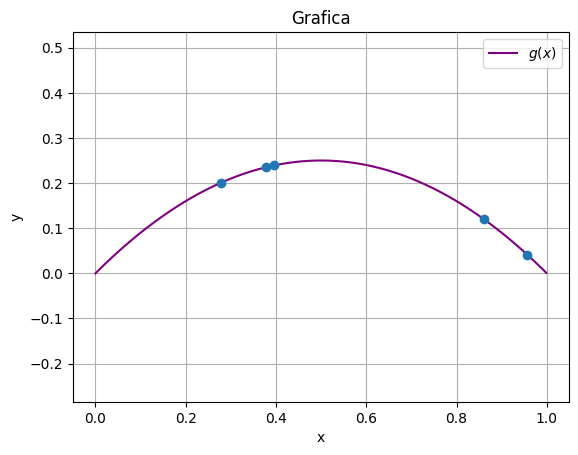

In [68]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

x = []
for i in lista:
  x.append(i[0])

y = list(map(g ,x))

x1 = np.arange(a,b,0.001)

plt.title('Grafica')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x1,g(x1),color="purple",label="$g(x)$")
plt.plot(x,y,"o")
plt.legend(loc='upper right')
plt.axis('equal')
plt.grid()
plt.show()

**PASO 4**. Cuente el número de casos $N_H$ para los cuales $g(X_i)>cU_i^{'}$

In [69]:
c = 1

def NH(f):
  n = 0
  for i in lista:
    if f(i[0])>i[1]:
      n+=1
  return n
print(NH(g))

2


**PASO 5**. Estime la integral $I$ por $\theta_1=c(b-a)\dfrac{N_H}{N}$

In [74]:
I = lambda a,b,c,N,f: c*(b-a)*(NH(f)/N)
print(I(a,b,c,N,g))

0.002


Use el método de Acierto y Error para estimar las integrales:

$$(a) \int_{0}^{1}e^{e^x}dx$$
$$(b) \int_0^1\sqrt{(1-x^2)^3}dx$$

In [82]:
from math import exp

g1 = lambda x: exp(exp(x)) # funcion del inciso a

N = 1000

a = 0
b = 1
c = 1





**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

**PASO 10**. Halle el intervalo de confianza de la probabilidad de queaparezcan dos caras lanzando tres veces una moneda
al aire con un nivel de confianza del $95 \%$.